In [1]:
from SimPEG import Utils, Mesh
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
# Nicer graphcis
import seaborn
seaborn.set()

In [3]:
# Load Mesh
mesh = Mesh.load_mesh('../Forward/mesh_inverse')

# Define no-data-value
ndv = -100

# Load topography file in UBC format and find the active cells
# Import Topo
model_dir = '../Geology_Surfaces/'
topofile = model_dir + 'TKCtopo.dat'
topo = np.genfromtxt(topofile, skip_header=1)
# Find the active cells
actv = Utils.surface2ind_topo(mesh, topo, gridLoc='N')

In [4]:
# Define Petrophysics for gravity only, for PK only
model_grav = mesh.readModelUBC(
    '../Forward/model_grav.den'
)
geomodel = mesh.readModelUBC(
    '../Forward/geomodel'
) 
model_grav = model_grav[model_grav != -100.]
n = 2
weights_init = np.r_[
    np.count_nonzero(geomodel[mesh.vol==mesh.vol.min()] == 0.),
    np.count_nonzero(geomodel[mesh.vol==mesh.vol.min()] == 1.)+ np.count_nonzero(geomodel[mesh.vol==mesh.vol.min()] == 2.),
]/len(geomodel[np.logical_and(mesh.vol==mesh.vol.min(),geomodel!=-100.)])
means_init = np.array([0., -0.8,]).reshape(n, 1)
cov_init = np.array(
    [[2.*1e-4],
     [8e-4]]).reshape((n, 1, 1))
clf = Utils.WeightedGaussianMixture(
    n_components=n,
    mesh = mesh,
    actv = actv,
    covariance_type='full',
    reg_covar=1e-7,
    means_init=means_init,
    precisions_init=np.linalg.inv(cov_init),
    n_init=1,
    max_iter=100,
    tol=1e-3,
    init_params='random'
)
clf.fit(model_grav.reshape(-1, 1))
Utils.order_clusters_GM_weight(clf)
clf.weights_ = weights_init
clf.means_ = means_init
clf.covariances_ = cov_init
clf.precisions_cholesky_ = Utils._compute_precision_cholesky(
    clf.covariances_, clf.covariance_type
)
Utils.computePrecision(clf)
Utils.order_clusters_GM_weight(clf)

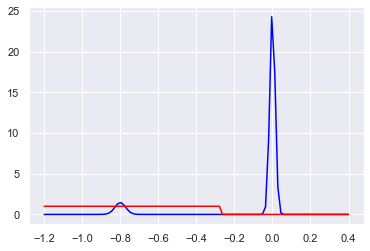

In [5]:
vmin, vmax = -1.2, 0.4
plt.plot(
     np.linspace(vmin, vmax, 100), np.exp(
         clf.score_samples(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='blue'
)
plt.plot(
     np.linspace(vmin, vmax, 100), (
         clf.predict(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='red'
)
#plt.gca().set_ylim([-10.,10.])
plt.show()

In [6]:
# Save the GMM
pickle.dump(clf, open("./gmm_density_PK.p", "wb"))

In [7]:
# Define Petrophysics for gravity only, for HK only
model_grav = mesh.readModelUBC(
    '../Forward/model_grav.den'
)
geomodel = mesh.readModelUBC(
    '../Forward/geomodel'
) 
model_grav = model_grav[model_grav != -100.]
n = 2
weights_init = np.r_[
    np.count_nonzero(geomodel[mesh.vol==mesh.vol.min()] == 0.),
    np.count_nonzero(geomodel[mesh.vol==mesh.vol.min()] == 1.)+ np.count_nonzero(geomodel[mesh.vol==mesh.vol.min()] == 2.),
]/len(geomodel[np.logical_and(mesh.vol==mesh.vol.min(),geomodel!=-100.)])
means_init = np.array([0., -0.2,]).reshape(n, 1)
cov_init = np.array(
    [[4.*1e-4],
     [2e-3]]).reshape((n, 1, 1))

clf = Utils.WeightedGaussianMixture(
    n_components=n,
    mesh = mesh,
    actv = actv,
    covariance_type='full',
    reg_covar=1e-7,
    means_init=means_init,
    precisions_init=np.linalg.inv(cov_init),
    n_init=1,
    max_iter=100,
    tol=1e-3,
    init_params='random'
)
clf.fit(model_grav.reshape(-1, 1))
Utils.order_clusters_GM_weight(clf)
clf.weights_ = weights_init
clf.means_ = means_init
clf.covariances_ = cov_init
clf.precisions_cholesky_ = Utils._compute_precision_cholesky(
    clf.covariances_, clf.covariance_type
)
Utils.computePrecision(clf)
Utils.order_clusters_GM_weight(clf)

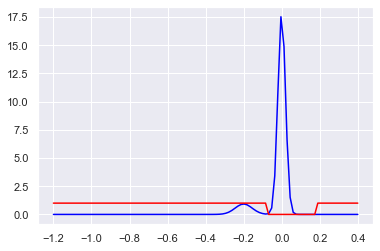

In [8]:
vmin, vmax = -1.2, 0.4
plt.plot(
     np.linspace(vmin, vmax, 100), np.exp(
         clf.score_samples(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='blue'
)
plt.plot(
     np.linspace(vmin, vmax, 100), (
         clf.predict(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='red'
)
#plt.gca().set_ylim([-10.,10.])
plt.show()

In [9]:
# Save the GMM
pickle.dump(clf, open("./gmm_density_HK.p", "wb"))

covariances_: [[[5.e-07]]

 [[2.e-06]]]


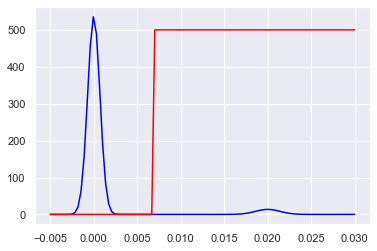

In [10]:
# Define Petrophysics for magnetic susceptibility only, for HK only

model_mag = mesh.readModelUBC(
    '../Forward/model_mag.sus'
)
geomodel = mesh.readModelUBC(
    '../Forward/geomodel'
)
model_mag = model_mag[model_mag != -100.]
n = 2
means_init = np.array([0., 0.02]).reshape(n, 1)
cov_init = 2. * np.array([[[(0.5*1e-3)**2.]],[[(1e-3)**2.]],])
weights_init = np.r_[
    np.count_nonzero(model_mag == 0.),
    np.count_nonzero(model_mag == 2e-2)+ np.count_nonzero(model_mag == 5e-3),
]
weights_init = weights_init/np.sum(weights_init)

clf = Utils.WeightedGaussianMixture(
    mesh = mesh,
    actv = actv,
    n_components=n,
    covariance_type='full',
    reg_covar=1e-7,
    means_init=means_init,
    precisions_init=np.linalg.inv(cov_init),
    n_init=1,
    max_iter=100,
    tol=1e-3,
    init_params='random'
)
clf.fit(model_mag.reshape(-1, 1))
Utils.order_clusters_GM_weight(clf)
clf.weights_ = weights_init
clf.means_ = means_init
clf.covariances_ = cov_init
clf.precisions_cholesky_ = Utils._compute_precision_cholesky(
    clf.covariances_, clf.covariance_type
)
Utils.computePrecision(clf)
Utils.order_clusters_GM_weight(clf)
print('covariances_:', clf.covariances_)
vmin, vmax = -0.005, 0.03
plt.plot(
     np.linspace(vmin, vmax, 100), np.exp(
         clf.score_samples(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='blue'
)
plt.plot(
     np.linspace(vmin, vmax, 100), (
         500.*clf.predict(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='red'
)
plt.show()

In [11]:
# Save the GMM
pickle.dump(clf, open("./gmm_magsus_HK.p", "wb"))

covariances_: [[[1.25e-07]]

 [[5.00e-07]]]


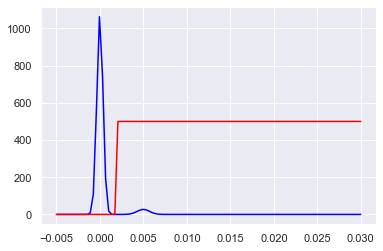

In [12]:
# Define Petrophysics for magnetic susceptibility only, for PK only

model_mag = mesh.readModelUBC(
    '../Forward/model_mag.sus'
)
geomodel = mesh.readModelUBC(
    '../Forward/geomodel'
)
model_mag = model_mag[model_mag != -100.]
n = 2
means_init = np.array([0., 0.005]).reshape(n, 1)
cov_init = np.array([[[1.25e-7]],[[5.00e-07]],])
weights_init = np.r_[
    np.count_nonzero(geomodel == 0.),
    np.count_nonzero(geomodel == 1.)+ np.count_nonzero(geomodel == 2.),
]/len(geomodel[geomodel!=-100.])

clf = Utils.WeightedGaussianMixture(
    mesh = mesh,
    actv = actv,
    n_components=n,
    covariance_type='full',
    reg_covar=1e-7,
    means_init=means_init,
    precisions_init=np.linalg.inv(cov_init),
    n_init=1,
    max_iter=100,
    tol=1e-3,
    init_params='random'
)
clf.fit(model_mag.reshape(-1, 1))
Utils.order_clusters_GM_weight(clf)
clf.weights_ = weights_init
clf.means_ = means_init
clf.covariances_ = cov_init
clf.precisions_cholesky_ = Utils._compute_precision_cholesky(
    clf.covariances_, clf.covariance_type
)
Utils.computePrecision(clf)
Utils.order_clusters_GM_weight(clf)
print('covariances_:', clf.covariances_)
vmin, vmax = -0.005, 0.03
plt.plot(
     np.linspace(vmin, vmax, 100), np.exp(
         clf.score_samples(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='blue'
)
plt.plot(
     np.linspace(vmin, vmax, 100), (
         500.*clf.predict(np.linspace(vmin, vmax, 100)[:, np.newaxis])
     ),
     color='red'
)
plt.show()

In [13]:
# Save the GMM
pickle.dump(clf, open("./gmm_magsus_PK.p", "wb"))

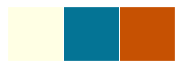

In [14]:
# Create geological classification colormap
import seaborn, matplotlib
colors = ["off white", "sea blue", "dark orange"]
geocmap = seaborn.xkcd_palette(colors)
seaborn.palplot(geocmap)
geocmap = matplotlib.colors.ListedColormap(geocmap, name='from_list', N=None)

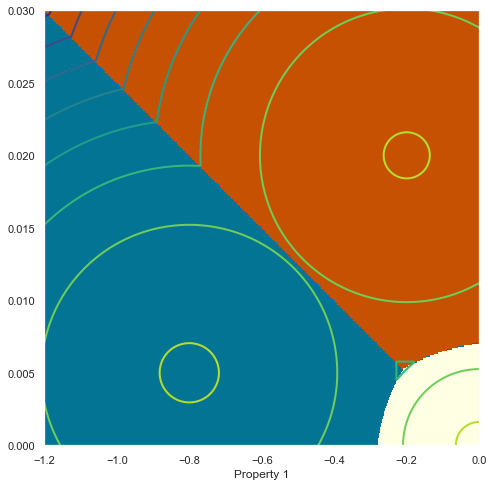

In [15]:
# Define Petrophysics for joint distribution
model_grav = mesh.readModelUBC(
    '../Forward/model_grav.den'
)
model_grav = model_grav[model_grav != -100.]

model_mag = mesh.readModelUBC(
    '../Forward/model_mag.sus'
)
model_mag = model_mag[model_mag != -100.]

means_init = np.array([[0.,  0.],
                       [-0.8,  0.005],
                       [-0.2,  0.02]])

cov_init_diag = 0.5 * np.array([[(2.*1. * 1e-2)**2.,(1. * 0.5 * 1e-3)**2.],
                         [(2.*2. * 1e-2)**2.,  (2. * 0.5 * 1e-3)**2.],
                         [(2.*2. * 1e-2)**2., (2. * 0.5 * 1e-3)**2.]])

n = 3
X = np.vstack([model_grav, model_mag]).T

clfref = Utils.WeightedGaussianMixture(n_components=n,
                      mesh=mesh,actv=actv,
                      covariance_type='diag',
                      reg_covar=1e-7,
                      means_init=means_init,
                      precisions_init=1./cov_init_diag,#np.linalg.inv(cov_init),
                      n_init=1,
                      max_iter=100,
                      tol=1e-3)
clfref.fit(X)
Utils.order_clusters_GM_weight(clfref)
clfref.means_ = means_init
clfref.covariances_ = cov_init_diag
clfref.precisions_cholesky_ = Utils._compute_precision_cholesky(
    clfref.covariances_, clfref.covariance_type
)
Utils.computePrecision(clfref)
Utils.order_clusters_GM_weight(clfref)

#Plot
x, y = np.mgrid[-1.21:0.1:.0001, -0.01:0.031:.0001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = clfref.score_samples(pos.reshape(-1, 2))
rvm = clfref.predict(pos.reshape(-1, 2))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.contour(x, y, rv.reshape(x.shape), cmap='viridis', linewidths=2)
ax.contourf(x, y, rvm.reshape(x.shape), cmap=geocmap)

ax.set_xlabel('Property 1')
ax.set_xlim(-1.2, 0.)
ax.set_ylim(0, 0.03)
ax.set_aspect(40)
plt.show()

In [16]:
clfref.covariances_

array([[2.00e-04, 1.25e-07],
       [8.00e-04, 5.00e-07],
       [8.00e-04, 5.00e-07]])

In [17]:
# Save the GMM
pickle.dump(clfref, open("./gmm_density_magsus.p", "wb"))

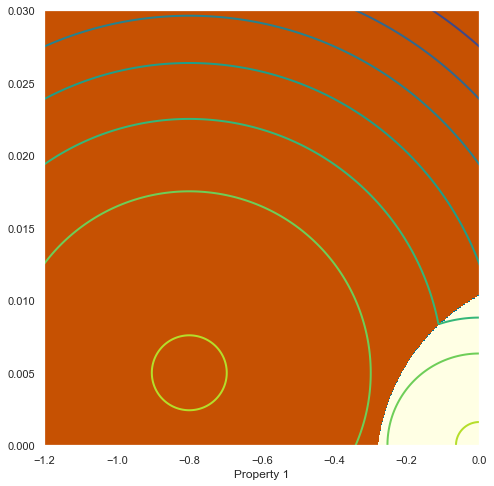

In [18]:
# Only 2 Clusters for the inversion with no petrophysical information
means_init = np.array([[0.,  0.],
                       [-0.8,  0.005],
                      ])

weights_init = np.r_[0.9,0.1]

cov_init_diag = 0.5 * np.array([[(2.*1. * 1e-2)**2.,(1. * 0.5 * 1e-3)**2.],
                         [(2.*2. * 1e-2)**2.,  (2. * 0.5 * 1e-3)**2.],
                         #[(2.*2. * 1e-2)**2., (2. * 0.5 * 1e-3)**2.]
                               ])

n = 2
X = np.vstack([model_grav, model_mag]).T

clfref = Utils.WeightedGaussianMixture(n_components=n,
                      mesh=mesh,actv=actv,
                      covariance_type='diag',
                      reg_covar=1e-7,
                      means_init=means_init,
                      precisions_init=1./cov_init_diag,#np.linalg.inv(cov_init),
                      n_init=1,
                      max_iter=100,
                      tol=1e-3)
clfref.fit(X)
Utils.order_clusters_GM_weight(clfref)
# Set covariances for scaling, 99% samples are within 20% of the highest values
clfref.means_ = means_init
clfref.covariances_ = cov_init_diag
clfref.weights_ = weights_init
clfref.precisions_cholesky_ = Utils._compute_precision_cholesky(
    clfref.covariances_, clfref.covariance_type
)
Utils.computePrecision(clfref)
Utils.order_clusters_GM_weight(clfref)

#Plot
x, y = np.mgrid[-1.21:0.1:.0001, -0.01:0.031:.0001]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
rv = clfref.score_samples(pos.reshape(-1, 2))
rvm = clfref.predict(pos.reshape(-1, 2))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.contour(x, y, rv.reshape(x.shape), cmap='viridis', linewidths=2)
ax.contourf(x, y, rvm.reshape(x.shape), cmap=geocmap)

ax.set_xlabel('Property 1')
ax.set_xlim(-1.2, 0.)
ax.set_ylim(0, 0.03)
ax.set_aspect(40)
plt.show()

In [19]:
# Save the GMM
pickle.dump(clfref, open("./gmm_density_magsus_2clusters.p", "wb"))